In [52]:
import scanpy as sc
import numpy as np

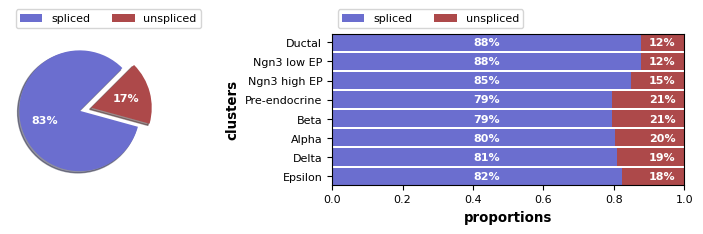

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


(3696, 50)

In [53]:
import scvelo as scv
##%matplotlib qt

##scv.set_figure_params()
adata = scv.datasets.pancreas()
scv.pl.proportions(adata)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata, basis='pca')

adata.obsm['velocity_pca'].shape

In [7]:
sc.tl.umap(adata, n_components=3, random_state=66)

In [8]:
scv.tl.velocity_embedding(adata, basis='umap')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [9]:
import umap
u = umap.UMAP(n_components=3, random_state=66)

In [29]:
expression = [adata.X.toarray()]

for t in [0.1, 1, 5, 10, 20, 30, 50, 100]: 
    expression.append(adata.X.toarray()+adata.layers['velocity'] * t)

umap = u.fit_transform(np.vstack(expression))

In [30]:
for i, t in enumerate([0.1, 1, 5, 10, 20, 30, 50, 100]):
    print(umap[(i * 3696): (i * 3696+3696), :].shape)
    adata.obsm[f'absolute_velocity_umap_{t}s'] = umap[(i * 3696): (i * 3696+3696), :]

(3696, 3)
(3696, 3)
(3696, 3)
(3696, 3)
(3696, 3)
(3696, 3)
(3696, 3)
(3696, 3)


In [31]:
adata.write('pancrease_velocity.h5ad')

In [40]:
!pwd

/Users/qq06/Documents/singlecellvr/examples


In [36]:
import seaborn as sns

In [46]:
map_dict = {}
for i, j in zip(np.arange(len(adata.obs.clusters.astype('category').cat.categories)),
                adata.obs.clusters.astype('category').cat.categories):
    map_dict[j] = i

In [50]:
%matplotlib inline

In [54]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

for ii in range(360,60):    
    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=10., azim=ii)
    
    ax.quiver(adata.obsm['X_umap'][:, 0], 
              adata.obsm['X_umap'][:, 1],
              adata.obsm['X_umap'][:, 2], 
              adata.obsm['velocity_umap'][:, 0], 
              adata.obsm['velocity_umap'][:, 1],
              adata.obsm['velocity_umap'][:, 2], length=0.4, 
              normalize=True, linewidth=1.2, color='black')
    scatter = ax.scatter(adata.obsm['X_umap'][:, 0],
                         adata.obsm['X_umap'][:, 1],
                         adata.obsm['X_umap'][:, 2],
                         c=adata.obs.clusters.astype('category').map(map_dict).values.astype('int32'),
                         cmap='Spectral')
    plt.legend(handles=scatter.legend_elements()[0],
               labels=adata.obs.clusters.cat.categories.tolist(),
               loc="lower left", title="Cell types")
    plt.show()

In [55]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

for ii in range(360,60):    
    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=10., azim=ii)
    
    ax.quiver(adata.obsm['X_umap'][:, 0], 
              adata.obsm['X_umap'][:, 1],
              adata.obsm['X_umap'][:, 2], 
              adata.obsm['velocity_umap'][:, 0], 
              adata.obsm['velocity_umap'][:, 1],
              adata.obsm['velocity_umap'][:, 2], 
              length=0.4, normalize=True, linewidth=1.2, color='black')

    scatter = ax.scatter(adata.obsm['X_umap'][:, 0],
                         adata.obsm['X_umap'][:, 1],
                         adata.obsm['X_umap'][:, 2],
                         c=adata.obs.clusters.astype('category').map(map_dict).values.astype('int32'),
                         cmap='Spectral')

    plt.legend(handles=scatter.legend_elements()[0],
               labels=adata.obs.clusters.cat.categories.tolist(),
               loc="lower left", title="Cell types")
    plt.show()    